**Prediction for Renttherunway and ModCloth Dataset**

In [0]:
#import required libraries for your algorithm 
import tensorflow as tf
import json
import csv
import pandas as pd

tf.enable_eager_execution()

In [3]:
#import drive to load the data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
file_path = '/content/drive/My Drive/'

**Reading Renttherunway dataset.**

In [95]:
#load renttherunway data
cloth_data = pd.read_json(file_path+ 'renttherunway_final_data.json', lines=True)
cloth_data.head(5)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [0]:
#change the names of the column in order to get rid of spaces
cloth_data.columns = ['fit','user_id', 'bra_size', 'item_id' , 'weight', 'rating', 'rented_for', 'review_text','body_type', 'review_summary', 'category','height', 'size','age', 'review_date']

**Execute the below 4 steps for using renttherunway unbaised data.**

In [8]:
#for extracting un-biased data
data = cloth_data[cloth_data.fit  == 'fit']
data = data.head(25000) #will consder only some amount of data that is fit to make data un-biased 
data.head(1)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"


In [9]:
data_small = cloth_data[cloth_data.fit  == 'small'] 
data_small.head(1)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
10,small,185966,34b,1077123,135lbs,8.0,party,The dress arrived with a small hole in the bea...,athletic,It was fun to wear a dress I wouldn't normally...,dress,"5' 3""",12,33.0,"January 2, 2018"


In [10]:
data_large = cloth_data[cloth_data.fit  == 'large']
data_large.head(1)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
11,large,533900,34b,130259,135lbs,8.0,wedding,This dress was absolutely gorgeous and I recei...,pear,"Stunning dress, perfect for a New Year's Eve w...",dress,"5' 6""",8,30.0,"January 7, 2013"


In [11]:
cloth_data = pd.concat([data,data_small,data_large])
cloth_data.head(1)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"


**Preprocessing of renttherunway data**

In [0]:
#Code to calculate TF*IDF for the text in “review_text”
#import pandas as pd
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics.pairwise import linear_kernel 
#ds = pd.read_json("renttherunway_final_data.json",lines = True)
#ds['review_text'].head()
#tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
#tfidf_matrix = tf.fit_transform(ds['review_text'])

In [97]:
from sklearn.utils import shuffle

cloth_data = shuffle(cloth_data) #shuffle the data
cloth_data.head(20)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
31707,large,222286,NaN,134849,135lbs,10.0,formal affair,followed reviewers advice and sized down for b...,hourglass,"really clean lines, pretty dress AND comfortab...",gown,"5' 4""",12,44.0,"November 19, 2013"
64978,fit,239140,36c,770712,185lbs,8.0,formal affair,"It is true to size, the color is more burgundy...",pear,I used this outfit for formal family photos. ...,dress,"5' 5""",28,40.0,"April 11, 2017"
99684,small,280782,34b,2511676,118lbs,10.0,vacation,Great jacket to dress up jeans or dress down a...,athletic,Perfect!,jacket,"5' 4""",8,64.0,"May 15, 2016"
103627,large,513187,36c,806803,125lbs,8.0,wedding,This dress fit maybe a little big. I normally ...,hourglass,Beautiful lace dress that flattered all the ri...,dress,"5' 4""",8,40.0,"November 28, 2014"
126534,fit,171829,34c,1980086,130lbs,10.0,formal affair,Incredibly comfortable and forgiving dress. I...,hourglass,"Great night, great dress, great charity event.",gown,"5' 6""",12,54.0,"February 16, 2017"
154478,fit,776484,36c,2600623,NaN,10.0,everyday,I wore this several times while I had it rente...,full bust,Perfect for work or casual wear!,top,"5' 3""",16,40.0,"September 18, 2017"
128874,fit,116555,36d+,132738,150lbs,8.0,formal affair,This gown is REALLY sparkly! You will definit...,hourglass,Beautiful gown!,gown,"5' 3""",20,46.0,"October 22, 2013"
148347,fit,850301,NaN,1003076,125lbs,10.0,wedding,I ordered a 2 and 4 and ended up wearing the 2...,NaN,Dresses arrived on time and both looked brand ...,dress,"5' 7""",4,36.0,"November 7, 2016"
31603,fit,619769,32c,169961,134lbs,8.0,wedding,This dress was amazing! It was tight and close...,athletic,Git like a glove,sheath,"5' 7""",8,33.0,"May 29, 2014"
89411,fit,385028,38d,820057,NaN,8.0,wedding,It does fit a little tight in the hips/midsect...,full bust,I got so many compliments on this dress! Wore ...,gown,"5' 7""",28,25.0,"February 14, 2017"


In [98]:
cloth_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192544 entries, 31707 to 132409
Data columns (total 15 columns):
fit               192544 non-null object
user_id           192544 non-null int64
bra_size          174133 non-null object
item_id           192544 non-null int64
weight            162562 non-null object
rating            192462 non-null float64
rented_for        192534 non-null object
review_text       192544 non-null object
body_type         177907 non-null object
review_summary    192544 non-null object
category          192544 non-null object
height            191867 non-null object
size              192544 non-null int64
age               191584 non-null float64
review_date       192544 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 23.5+ MB


In [99]:
cloth_data.bra_size.fillna('Unknown', inplace=True)  #bra_size contains missing value so will replace with unknown for later categorical conversion.
#cloth_data.cup_size = cloth_data.cup_size.astype('category').cat.as_ordered()
cloth_data.head(20)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
31707,large,222286,Unknown,134849,135lbs,10.0,formal affair,followed reviewers advice and sized down for b...,hourglass,"really clean lines, pretty dress AND comfortab...",gown,"5' 4""",12,44.0,"November 19, 2013"
64978,fit,239140,36c,770712,185lbs,8.0,formal affair,"It is true to size, the color is more burgundy...",pear,I used this outfit for formal family photos. ...,dress,"5' 5""",28,40.0,"April 11, 2017"
99684,small,280782,34b,2511676,118lbs,10.0,vacation,Great jacket to dress up jeans or dress down a...,athletic,Perfect!,jacket,"5' 4""",8,64.0,"May 15, 2016"
103627,large,513187,36c,806803,125lbs,8.0,wedding,This dress fit maybe a little big. I normally ...,hourglass,Beautiful lace dress that flattered all the ri...,dress,"5' 4""",8,40.0,"November 28, 2014"
126534,fit,171829,34c,1980086,130lbs,10.0,formal affair,Incredibly comfortable and forgiving dress. I...,hourglass,"Great night, great dress, great charity event.",gown,"5' 6""",12,54.0,"February 16, 2017"
154478,fit,776484,36c,2600623,NaN,10.0,everyday,I wore this several times while I had it rente...,full bust,Perfect for work or casual wear!,top,"5' 3""",16,40.0,"September 18, 2017"
128874,fit,116555,36d+,132738,150lbs,8.0,formal affair,This gown is REALLY sparkly! You will definit...,hourglass,Beautiful gown!,gown,"5' 3""",20,46.0,"October 22, 2013"
148347,fit,850301,Unknown,1003076,125lbs,10.0,wedding,I ordered a 2 and 4 and ended up wearing the 2...,NaN,Dresses arrived on time and both looked brand ...,dress,"5' 7""",4,36.0,"November 7, 2016"
31603,fit,619769,32c,169961,134lbs,8.0,wedding,This dress was amazing! It was tight and close...,athletic,Git like a glove,sheath,"5' 7""",8,33.0,"May 29, 2014"
89411,fit,385028,38d,820057,NaN,8.0,wedding,It does fit a little tight in the hips/midsect...,full bust,I got so many compliments on this dress! Wore ...,gown,"5' 7""",28,25.0,"February 14, 2017"


In [100]:
#convertng height from feet and inches into cm
def convert_to_cms(x):
  if type(x) == type(1.0):
    return
  try:
    return (int(x[0])*30.48) + (int(x[3:-1])*2.54)
  except:
    return (int(x[0])*30.48)

cloth_data.height = cloth_data.height.apply(convert_to_cms)
cloth_data.head()

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
31707,large,222286,Unknown,134849,135lbs,10.0,formal affair,followed reviewers advice and sized down for b...,hourglass,"really clean lines, pretty dress AND comfortab...",gown,162.56,12,44.0,"November 19, 2013"
64978,fit,239140,36c,770712,185lbs,8.0,formal affair,"It is true to size, the color is more burgundy...",pear,I used this outfit for formal family photos. ...,dress,165.10,28,40.0,"April 11, 2017"
99684,small,280782,34b,2511676,118lbs,10.0,vacation,Great jacket to dress up jeans or dress down a...,athletic,Perfect!,jacket,162.56,8,64.0,"May 15, 2016"
103627,large,513187,36c,806803,125lbs,8.0,wedding,This dress fit maybe a little big. I normally ...,hourglass,Beautiful lace dress that flattered all the ri...,dress,162.56,8,40.0,"November 28, 2014"
126534,fit,171829,34c,1980086,130lbs,10.0,formal affair,Incredibly comfortable and forgiving dress. I...,hourglass,"Great night, great dress, great charity event.",gown,167.64,12,54.0,"February 16, 2017"


In [101]:
#get the missing values from the code
missing_data = pd.DataFrame({'total_missing': cloth_data.isnull().sum(), 'perc_missing': (cloth_data.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
fit,0,0.000000
user_id,0,0.000000
bra_size,0,0.000000
item_id,0,0.000000
weight,29982,36.214519
rating,82,0.099046
rented_for,10,0.012079
review_text,0,0.000000
body_type,14637,17.679671
review_summary,0,0.000000


In [102]:
# In the following code sections, tried to change unknown into data by filling negative values.
cloth_data.body_type.fillna('NA', inplace=True)
cloth_data.head(1)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
31707,large,222286,Unknown,134849,135lbs,10.0,formal affair,followed reviewers advice and sized down for b...,hourglass,"really clean lines, pretty dress AND comfortab...",gown,162.56,12,44.0,"November 19, 2013"


In [103]:
cloth_data.rating.fillna(-1.0, inplace=True)
cloth_data.head(1)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
31707,large,222286,Unknown,134849,135lbs,10.0,formal affair,followed reviewers advice and sized down for b...,hourglass,"really clean lines, pretty dress AND comfortab...",gown,162.56,12,44.0,"November 19, 2013"


In [104]:
cloth_data.height.fillna(-1.0, inplace=True)
cloth_data.head(1)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
31707,large,222286,Unknown,134849,135lbs,10.0,formal affair,followed reviewers advice and sized down for b...,hourglass,"really clean lines, pretty dress AND comfortab...",gown,162.56,12,44.0,"November 19, 2013"


In [105]:
cloth_data.age.fillna(-1.0, inplace=True)
cloth_data.head(1)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
31707,large,222286,Unknown,134849,135lbs,10.0,formal affair,followed reviewers advice and sized down for b...,hourglass,"really clean lines, pretty dress AND comfortab...",gown,162.56,12,44.0,"November 19, 2013"


In [106]:
#removing the lbs from the weight
cloth_data['weight'] = cloth_data['weight'].map(lambda x: str(x)[:-3])
cloth_data.head(10)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
31707,large,222286,Unknown,134849,135,10.0,formal affair,followed reviewers advice and sized down for b...,hourglass,"really clean lines, pretty dress AND comfortab...",gown,162.56,12,44.0,"November 19, 2013"
64978,fit,239140,36c,770712,185,8.0,formal affair,"It is true to size, the color is more burgundy...",pear,I used this outfit for formal family photos. ...,dress,165.10,28,40.0,"April 11, 2017"
99684,small,280782,34b,2511676,118,10.0,vacation,Great jacket to dress up jeans or dress down a...,athletic,Perfect!,jacket,162.56,8,64.0,"May 15, 2016"
103627,large,513187,36c,806803,125,8.0,wedding,This dress fit maybe a little big. I normally ...,hourglass,Beautiful lace dress that flattered all the ri...,dress,162.56,8,40.0,"November 28, 2014"
126534,fit,171829,34c,1980086,130,10.0,formal affair,Incredibly comfortable and forgiving dress. I...,hourglass,"Great night, great dress, great charity event.",gown,167.64,12,54.0,"February 16, 2017"
154478,fit,776484,36c,2600623,,10.0,everyday,I wore this several times while I had it rente...,full bust,Perfect for work or casual wear!,top,160.02,16,40.0,"September 18, 2017"
128874,fit,116555,36d+,132738,150,8.0,formal affair,This gown is REALLY sparkly! You will definit...,hourglass,Beautiful gown!,gown,160.02,20,46.0,"October 22, 2013"
148347,fit,850301,Unknown,1003076,125,10.0,wedding,I ordered a 2 and 4 and ended up wearing the 2...,NA,Dresses arrived on time and both looked brand ...,dress,170.18,4,36.0,"November 7, 2016"
31603,fit,619769,32c,169961,134,8.0,wedding,This dress was amazing! It was tight and close...,athletic,Git like a glove,sheath,170.18,8,33.0,"May 29, 2014"
89411,fit,385028,38d,820057,,8.0,wedding,It does fit a little tight in the hips/midsect...,full bust,I got so many compliments on this dress! Wore ...,gown,170.18,28,25.0,"February 14, 2017"


In [107]:
#remove blank spaces from the weight column and add nan to it
import numpy as np

cloth_data=cloth_data.replace(r'^\s*$', np.nan, regex=True)
cloth_data.weight.fillna('-1', inplace=True)
cloth_data.head(5)

,fit,user_id,bra_size,item_id,weight,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date
31707,large,222286,Unknown,134849,135,10.0,formal affair,followed reviewers advice and sized down for b...,hourglass,"really clean lines, pretty dress AND comfortab...",gown,162.56,12,44.0,"November 19, 2013"
64978,fit,239140,36c,770712,185,8.0,formal affair,"It is true to size, the color is more burgundy...",pear,I used this outfit for formal family photos. ...,dress,165.10,28,40.0,"April 11, 2017"
99684,small,280782,34b,2511676,118,10.0,vacation,Great jacket to dress up jeans or dress down a...,athletic,Perfect!,jacket,162.56,8,64.0,"May 15, 2016"
103627,large,513187,36c,806803,125,8.0,wedding,This dress fit maybe a little big. I normally ...,hourglass,Beautiful lace dress that flattered all the ri...,dress,162.56,8,40.0,"November 28, 2014"
126534,fit,171829,34c,1980086,130,10.0,formal affair,Incredibly comfortable and forgiving dress. I...,hourglass,"Great night, great dress, great charity event.",gown,167.64,12,54.0,"February 16, 2017"


In [108]:
missing_data = pd.DataFrame({'total_missing': cloth_data.isnull().sum(), 'perc_missing': (cloth_data.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
fit,0,0.000000
user_id,0,0.000000
bra_size,0,0.000000
item_id,0,0.000000
weight,0,0.000000
rating,0,0.000000
rented_for,10,0.012079
review_text,2,0.002416
body_type,0,0.000000
review_summary,16,0.019326


In [109]:
#dropping unnecessary data
cloth_data = cloth_data.drop(['rented_for', 'review_text', 'review_summary', 'category', 'review_date'], axis=1)
cloth_data.head()

,fit,user_id,bra_size,item_id,weight,rating,body_type,height,size,age
31707,large,222286,Unknown,134849,135,10.0,hourglass,162.56,12,44.0
64978,fit,239140,36c,770712,185,8.0,pear,165.10,28,40.0
99684,small,280782,34b,2511676,118,10.0,athletic,162.56,8,64.0
103627,large,513187,36c,806803,125,8.0,hourglass,162.56,8,40.0
126534,fit,171829,34c,1980086,130,10.0,hourglass,167.64,12,54.0


In [0]:
# Changing the data type in order to consider as a valid feature in tensor flow.
cloth_data['body_type'] = cloth_data['body_type'].astype(str)
cloth_data['bra_size'] = cloth_data['bra_size'].astype(str)
cloth_data['weight'] = cloth_data['weight'].astype(float)

In [69]:
cloth_data.head(1)

,fit,user_id,bra_size,item_id,weight,rating,body_type,height,size,age
161190,fit,491957,36d,1697202,135.0,8.0,hourglass,154.94,20,46.0


In [70]:
# for two algorithms DNN classifier and Logistic regressing will convert fit into interger values 
cloth_data['fit'] = cloth_data.fit.replace('small' , 0)
cloth_data['fit'] = cloth_data.fit.replace("fit" , 1)
cloth_data['fit'] = cloth_data.fit.replace("large" , 2)
cloth_data.head(1)

,fit,user_id,bra_size,item_id,weight,rating,body_type,height,size,age
161190,1,491957,36d,1697202,135.0,8.0,hourglass,154.94,20,46.0


In [0]:
#for keras sequencial algorithn we wil convet it to one hot encoding in order to predict other features like tp, tr etc
cloth_data['fit_one_hot'] = cloth_data['fit'].str.get_dummies().values.tolist()
cloth_data = cloth_data.drop('fit',axis=1)

In [71]:
cloth_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192544 entries, 161190 to 1833
Data columns (total 10 columns):
fit          192544 non-null int64
user_id      192544 non-null int64
bra_size     192544 non-null object
item_id      192544 non-null int64
weight       192544 non-null float64
rating       192544 non-null float64
body_type    192544 non-null object
height       192544 non-null float64
size         192544 non-null int64
age          192544 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 16.2+ MB


In [0]:
# from sklearn.decomposition import PCA
# import numpy as np
# pca = PCA(n_components=len(cloth_data))
# pca.fit(cloth_data)
# cloth_data = np.matmul(cloth_data, pca.components_.T)

**Converting preprocessed data from pandas to tensorflow for multiclass classification.**

In [0]:
#import tensorflow libraries for multi class classification
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [0]:
#split the data into training and testing
train, test = train_test_split(cloth_data, test_size=0.2)

In [0]:
#split the training data into training and validation
train, val = train_test_split(train, test_size=0.2)

In [115]:
print(len(train))
print(len(test))
print(len(val))

123228
38509
30807


In [0]:
feature_columns = []

In [0]:
# consider the below features as numerical 
feature_columns.append(feature_column.numeric_column("weight"))
feature_columns.append(feature_column.numeric_column("rating"))
feature_columns.append(feature_column.numeric_column("height"))
feature_columns.append(feature_column.numeric_column("age"))
feature_columns.append(feature_column.numeric_column("size"))

In [0]:
# consider the below features as categorical
bra_size = feature_column.categorical_column_with_vocabulary_list(
      'bra_size', cloth_data.bra_size.unique())

In [0]:
bra_size_one_hot = feature_column.indicator_column(bra_size)
feature_columns.append(bra_size_one_hot)

In [0]:
item_id = feature_column.categorical_column_with_vocabulary_list(
      'item_id', cloth_data.item_id.unique())

In [0]:
item_id_one_hot = feature_column.indicator_column(item_id)
feature_columns.append(item_id_one_hot)

In [0]:
body_type = feature_column.categorical_column_with_vocabulary_list(
      'body_type', cloth_data.body_type.unique())

In [0]:
body_type_one_hot = feature_column.indicator_column(body_type)
feature_columns.append(body_type_one_hot)

Execute the below steps for classifiying labels from features using **tensorflow's DNN Classifier**

In [0]:
#pop the fit label for train as well as validation
y_train = train.pop('fit')
y_val = val.pop('fit')

In [0]:
def input_fn(features, labels, training=True, batch_size=512):
    # Converting into tensorflow Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # shuffle if in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [0]:
# train_input_fn = input_fn(train, y_train)
# eval_input_fn = input_fn(val, y_val)

In [86]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    # Setting the nodes to 30 and 10 for hidden layes.
    hidden_units=[30, 10],
    # Choose from 3 classes i.e. fit, small and large
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp29slv7yk', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7fd13f11d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [87]:
classifier.train(
    input_fn=lambda: input_fn(train, y_train, training=True),
    steps=5000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp29slv7yk/model.ckpt.
INFO:tensorflow:loss = 6105.871, step = 1
INFO:tensorflow:global_step/sec: 20.1333
INFO:tensorflow:loss = 382.19476, step = 101 (4.973 sec)
INFO:tensorflow:global_step/sec: 21.0913
INFO:tensorfl

In [88]:
#evaluate based on the trained model
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(val, y_val, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-21T05:56:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp29slv7yk/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-21-05:56:25
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.7416496, average_loss = 0.6941242, global_step = 5000, loss = 350.55548
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp29slv7yk/model.ckpt-5000

Test set accuracy: 0.742



Execute the below steps for classifiying labels from features using **tensorflow's Linear Model**

In [0]:

def make_input_fn(data_df, num_epochs=200, shuffle=True, batch_size=512):
  def input_function():
    # pop the fit for label and assign it to a variable 
    label_df = data_df.pop('fit')
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    #shuffle if in training mode.
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

In [0]:
#take train data and fit it into function defined.
train_input_fn = make_input_fn(train)
eval_input_fn = make_input_fn(val, num_epochs=1, shuffle=False)

In [93]:
#train the model using linear classifier
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=3)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqv_i4zmv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7fd10b82b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
Instructions for updat

In [94]:
#evaluate the data based on the trained model
eval_test_fn = make_input_fn(test, num_epochs=1, shuffle=False)
result_test = linear_est.evaluate(eval_test_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-21T06:30:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqv_i4zmv/model.ckpt-48200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-21-06:30:25
INFO:tensorflow:Saving dict for global step 48200: accuracy = 0.76179594, average_loss = 0.6525427, global_step = 48200, loss = 330.6417
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 48200: /tmp/tmpqv_i4zmv/model.ckpt-48200


Execute the below steps for classifiying labels from features using **tensorflow keras API Sequential algorithm**

In [0]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  # Replace 'fit_one_hot' with 'fit' when using SparseCategoricalCrossentropy
  labels = dataframe.pop('fit_one_hot')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  #shuffle if in trainig mode
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [0]:
#insert the feature column in the dense feature layers 
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [0]:
#create batch and execute the function for train dataset.
batch_size = 512
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [0]:
#using regularizer for better unbiased  prediction between training and validation data
reg = 0.001
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg)),
  layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg)),

  # layers.Dense(128, activation='relu'),
  # layers.Dense(128, activation='relu'),
  layers.Dense(3, activation='softmax', name='predictions')
])

In [0]:
#use different metrics for understanding
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

In [0]:
# model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=1e-4),  
#               # Loss function to minimize
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               # List of metrics to monitor
#               metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [0]:
#compile model by adding optimser,loss and metrices
›model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=1e-4),  
              loss= tf.keras.losses.CategoricalCrossentropy(),
              metrics= METRICS)

In [130]:
 #insert training and validation data for model training
 history = model.fit(train_ds,
            validation_data=val_ds,
            epochs=200)

Epoch 1/200
241/241 [==============================] - 19s 80ms/step - loss: 0.8286 - tp: 85229.0000 - fp: 31417.0000 - tn: 215039.0000 - fn: 37999.0000 - accuracy: 0.7144 - precision: 0.7307 - recall: 0.6916 - auc: 0.8244 - val_loss: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 2/200
241/241 [==============================] - 17s 72ms/step - loss: 0.7655 - tp: 90827.0000 - fp: 32359.0000 - tn: 214097.0000 - fn: 32401.0000 - accuracy: 0.7373 - precision: 0.7373 - recall: 0.7371 - auc: 0.8474 - val_loss: 0.7559 - val_tp: 22772.0000 - val_fp: 8030.0000 - val_tn: 53584.0000 - val_fn: 8035.0000 - val_accuracy: 0.7393 - val_precision: 0.7393 - val_recall: 0.7392 - val_auc: 0.8543
Epoch 3/200
241/241 [==============================] - 18s 73ms/step - loss: 0.7541 - tp: 90813.0000 - fp: 32347.0000 - tn: 214109.0000 - fn: 32415.0000 - acc

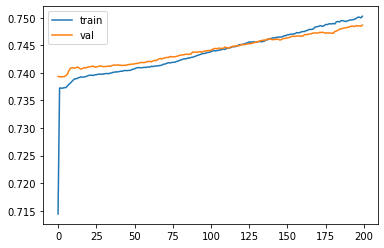

In [131]:
#using matplotlib to find the accuracy relation between training and test
from matplotlib import pyplot



pyplot.plot(history.history['accuracy'],label = 'train')
pyplot.plot(history.history['val_accuracy'],label = 'val')
pyplot.legend()
pyplot.show()

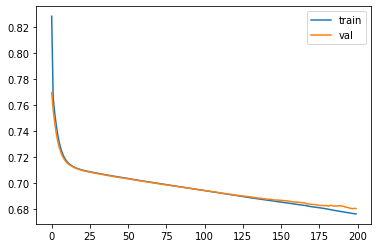

In [132]:
pyplot.plot(history.history['loss'],label = 'train')
pyplot.plot(history.history['val_loss'],label = 'val')
pyplot.legend()
pyplot.show()

In [133]:
#predict the test data from the trained model
for x, y in test_ds.take(1):
  print(model.predict(x))
  print(y)

[[0.82833475 0.08935418 0.08231111]
 [0.62438744 0.2568756  0.118737  ]
 [0.38426247 0.48006815 0.13566943]
 ...
 [0.8591848  0.12874027 0.01207489]
 [0.6825333  0.21529703 0.10216963]
 [0.6286182  0.16816902 0.20321275]]
tf.Tensor(
[[1 0 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 1 0]
 [0 0 1]
 [1 0 0]], shape=(512, 3), dtype=int32)


In [134]:
#find accuracy of the test data.
loss, tp, fp ,tn, fn, accuracy, precision, recall, auc = model.evaluate(test_ds)
print("Accuracy", accuracy)

76/76 [==============================] - 3s 43ms/step - loss: 0.6779 - tp: 28161.0000 - fp: 8846.0000 - tn: 68172.0000 - fn: 10348.0000 - accuracy: 0.7479 - precision: 0.7610 - recall: 0.7313 - auc: 0.8848
Accuracy 0.74792904
